### Описание задания:

Сократить число цветов в палитре изображения.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

### Этапы работы:

1) Получите данные и загрузите их в рабочую среду.
**a)** Загрузить картинку
**b)** Отобразить картинку

3) Реализуйте три модели кластеризации:
**a)** KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
**b)** DBSCAN
**c)** AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

4) Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

5) Сформулируйте выводы по проделанной работе.
**a)** Какая модель показала лучший результат?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2 as cv
import skimage

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from skimage.metrics import structural_similarity as ssim

In [2]:
image = cv.imread('Picture for project.jpg')

Снизим размер картинки для того, чтобы снять нагрузку при работе

In [3]:
image = cv.resize(image, (128, 128))

### Построение изображения

In [4]:
def draw_picture(image, title, bgr=False):
  # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
  b, g, r = cv.split(image) 
  new_image = cv.merge([r, g, b])
  plt.figure(figsize=(12, 8))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

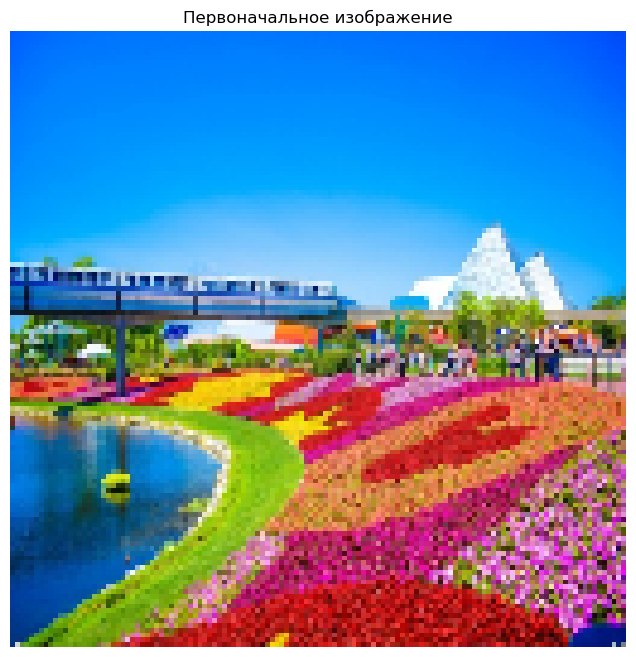

In [5]:
draw_picture(image, 'Первоначальное изображение')

### Реализация моделей кластеризации

In [6]:
data = image.reshape((-1,3))
data = np.float32(data)

**(a) Реализация модели кластеризации KMeans. Число кластеров K = 2, 5, 10, 20**

In [7]:
count_clusters = [2, 5, 10, 20]
for i in count_clusters:
  data_df = pd.DataFrame(data)
  model = KMeans(n_clusters = i, n_init=10)
  predict = model.fit_predict(data_df)
  data_df['cluster'] = pd.DataFrame(predict)
  data_df.set_index('cluster', inplace=True)
  data_train = data_df.copy()
  for cluster in range(i):
        for col in data_train.columns:
            median=data_train.loc[cluster,col].median()
            data_train.loc[cluster,col] = median
  data_train = data_train.to_numpy()
  print(f'Метод KMEANS с n_clusters = {i} даёт SSIM = {ssim(data, data_train, channel_axis=1)}')

Метод KMEANS с n_clusters = 2 даёт SSIM = 0.045152634382247925
Метод KMEANS с n_clusters = 5 даёт SSIM = 0.20208950340747833
Метод KMEANS с n_clusters = 10 даёт SSIM = 0.3177466094493866
Метод KMEANS с n_clusters = 20 даёт SSIM = 0.408954381942749


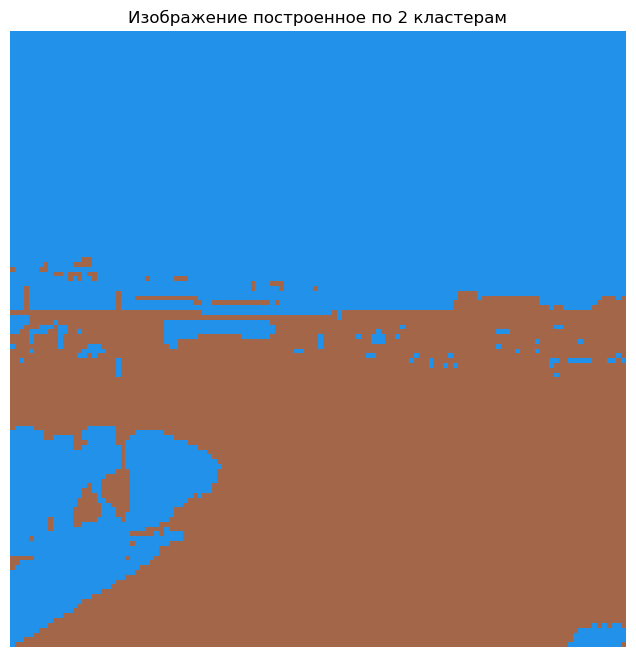

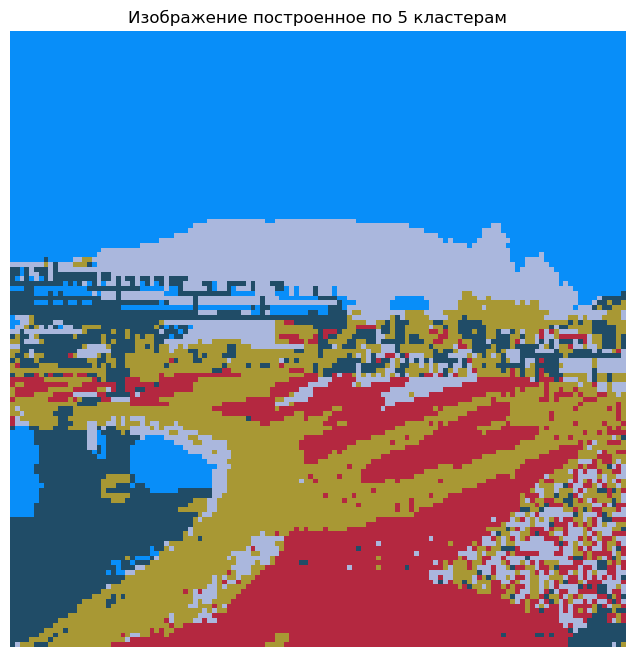

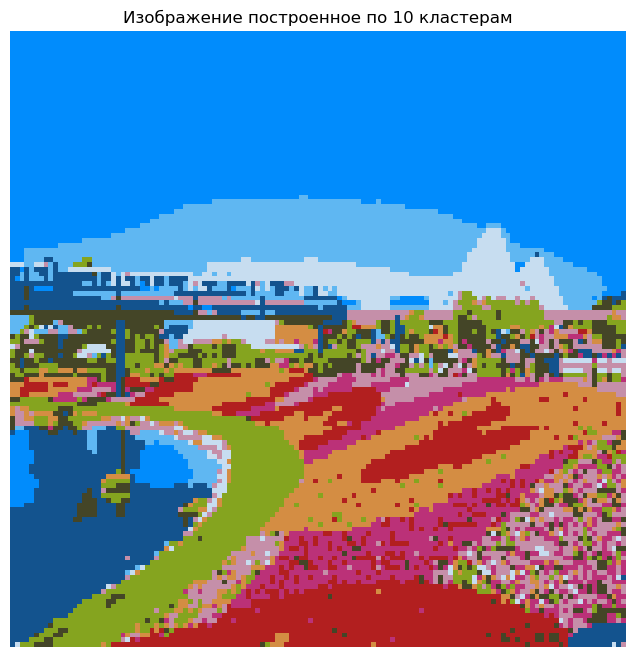

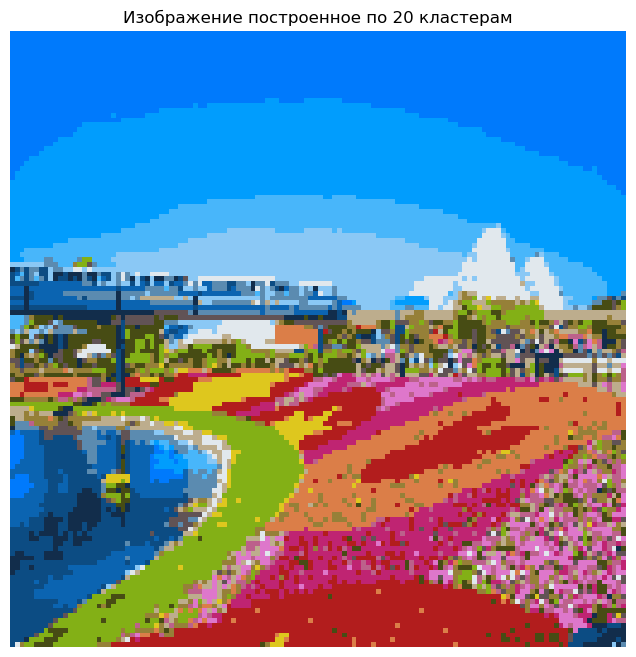

In [8]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
for i in count_clusters:
  ret, label, center=cv.kmeans(data, i, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((image.shape))
  draw_picture(res2, f'Изображение построенное по {i} кластерам')

**(b) Реализация модели кластеризации DBSCAN**

In [9]:
data_df = pd.DataFrame(data)
model = DBSCAN(eps = 5)
predict = model.fit_predict(data_df)
predict_df = pd.DataFrame(predict)
data_df['cluster'] = predict_df
data_df.set_index('cluster', inplace=True)
data_train = data_df.copy()
for cluster in range(max(predict)):
        for col in data_train.columns:
            median=data_train.loc[cluster,col].median()
            data_train.loc[cluster,col] = median
data_train = data_train.to_numpy()
print(f'Метод DBSCAN c eps = 5 даёт SSIM = {ssim(data, data_train, channel_axis=1)}')

Метод DBSCAN c eps = 5 даёт SSIM = 0.5596211552619934


**(c) Реализация модели кластеризации AgglomerativeClustering. Число кластеров K = 2, 5, 10, 20**

In [10]:
count_clusters = [2, 5, 10, 20]
for i in count_clusters:
  data_df = pd.DataFrame(data)
  model = AgglomerativeClustering(n_clusters = i)
  predict = model.fit_predict(data_df)
  data_df['cluster'] = pd.DataFrame(predict)
  data_df.set_index('cluster', inplace=True)
  data_train = data_df.copy()
  for cluster in range(i):
        for col in data_train.columns:
            median=data_train.loc[cluster,col].median()
            data_train.loc[cluster,col] = median
  data_train = data_train.to_numpy()
  print(f'Метод AgglomerativeClustering с n_clusters = {i} даёт SSIM = {ssim(data, data_train, channel_axis=1)}')

Метод AgglomerativeClustering с n_clusters = 2 даёт SSIM = 0.06458859145641327
Метод AgglomerativeClustering с n_clusters = 5 даёт SSIM = 0.21407867968082428
Метод AgglomerativeClustering с n_clusters = 10 даёт SSIM = 0.2907457649707794
Метод AgglomerativeClustering с n_clusters = 20 даёт SSIM = 0.392219215631485


### Выводы:

Для нормальной работы пришлось уменьшить размерность картинки до (128, 128), так как происходили вылеты из-за нехватки памяти Для понижения числа цветов в палитре применялся медианное значение по кластеру.

В результате были получены следующие значения метрики SSIM:

- Метод KMEANS с n_clusters = 2 даёт SSIM = 0.045152634382247925
- Метод KMEANS с n_clusters = 5 даёт SSIM = 0.20208950340747833
- Метод KMEANS с n_clusters = 10 даёт SSIM = 0.3177466094493866
- Метод KMEANS с n_clusters = 20 даёт SSIM = 0.408954381942749
- Метод DBSCAN c eps = 5 даёт SSIM = 0.5596211552619934
- Метод AgglomerativeClustering с n_clusters = 2 даёт SSIM = 0.06458859145641327
- Метод AgglomerativeClustering с n_clusters = 5 даёт SSIM = 0.21407867968082428
- Метод AgglomerativeClustering с n_clusters = 10 даёт SSIM = 0.2907457649707794
- Метод AgglomerativeClustering с n_clusters = 20 даёт SSIM = 0.392219215631485

Лучшие показатели метрики показал метод DBSCAN, KMEANS показал самую большую скорость обработки

Методы применялись без подбора оптимальных параметров